# ARIMA Model
## Coffee Sales - Time Modeling

For this `ARIMA Model` application, we're going to use a Kaggle dataset uploaded by Yaroslav Isaienkov.

Link: https://www.kaggle.com/datasets/ihelon/coffee-sales

Our goal will be to use the `ARIMA Model` to forecast total future coffee sales for the next month.

### Overview

This dataset contains detailed records of coffee sales from a vending machine.
The vending machine is the work of a dataset author who is committed to providing an open dataset to the community.
It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

### Data Collection Period

The dataset spans from March 2024 to Present time, capturing daily transaction data. And new information continues to be added.

### Importing python modules

In [1]:
import os
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np

### Uploading and reading data

In [2]:
read_dir = r'C:\Users\grace\Documents\TemasSelectosAdicionales\ProyectoEstadistica'
file_name = 'coffee.csv'
read_path = os.path.join(read_dir, file_name)
data = pd.read_csv(read_path)
data["date"] = pd.to_datetime(data["date"])
data.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
data.shape

(2175, 6)

### Grouping total sold cups by date

In [4]:
date_range = pd.date_range(start=data["date"].min(), end=data["date"].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_by_date = data.groupby("date").agg({"money": ["count"]}).reset_index()
df_by_date.columns = ["date", "cups"]
df_complete = pd.merge(complete_dates, df_by_date, on="date", how="left")
df_complete.fillna(0, inplace=True)
df_complete = df_complete.set_index('date')
df_complete.index = pd.to_datetime(df_complete.index)
df_complete.head()

,cups
date,
2024-03-01,11.0
2024-03-02,7.0
2024-03-03,10.0
2024-03-04,4.0
2024-03-05,9.0


### Ploting the Sold Cups Time Series

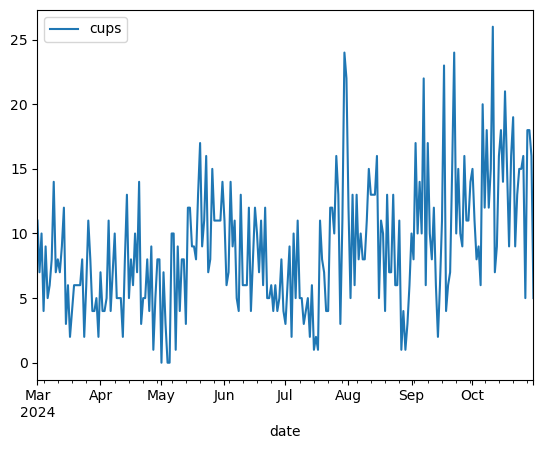

In [5]:
df_complete.plot()
plt.show()

### Testing stationarity: Dickey - Fuller Test

In [6]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(df_complete)
test

(-2.816110584742482,
 0.05600908118660811,
 5,
 239,
 {'1%': -3.458010773719797,
  '5%': -2.8737103617125186,
  '10%': -2.5732559963936206},
 1328.2830563306225)

If p-value $\leq$ 0.05 → We are working with stationary data

In [7]:
if test[1] <= 0.05:
    print("We have stationary data")
else: 
    print("The data isn't stationary, we can't use ARIMA")

The data isn't stationary, we can't use ARIMA


### Manipulating Data - Stationaritie Parameter `d`

<AxesSubplot:xlabel='date'>

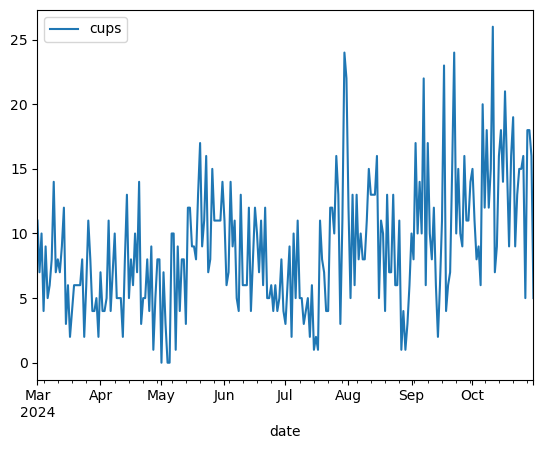

In [8]:
data_aux =  df_complete.copy()
data_aux.plot()

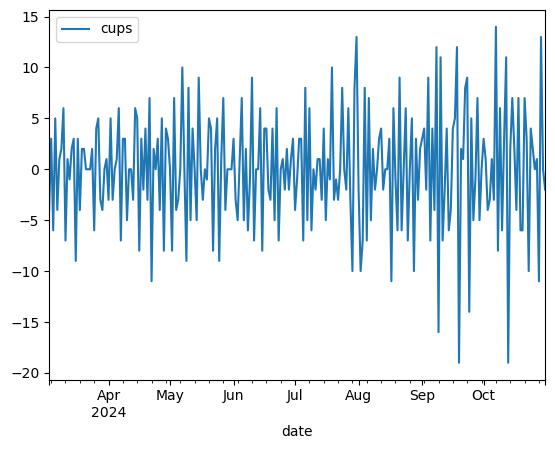

In [9]:
data_diff = data_aux.copy()
data_diff['cups'] = data_diff.cups.shift().diff()
data_stationary = data_diff.dropna() 
data_stationary.plot()
plt.show()

#### Applying the Dickye Fuller Test again

In [10]:
test2 = adfuller(data_stationary)
if test2[1] <= 0.05:
    print("We have stationary data, we can use ARIMA now! \n Stationaritie Parameter: d = 1")
else: 
    print("The data isn't stationary, we can't use ARIMA")

We have stationary data, we can use ARIMA now! 
 Stationaritie Parameter: d = 1


#### Using `pmdarima` to confirm

In [11]:
from pmdarima.arima.utils import ndiffs
d = ndiffs(df_complete)
d

1

### AR parameter `p`

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

C:\Users\grace\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


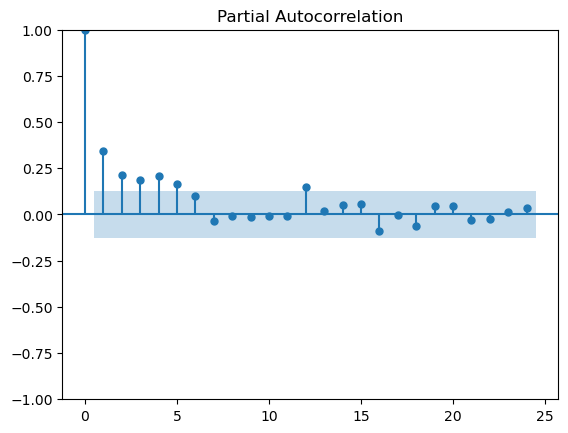

In [13]:
plot_pacf(df_complete)
plt.show()

`p = 2`

### MA parameter `q`

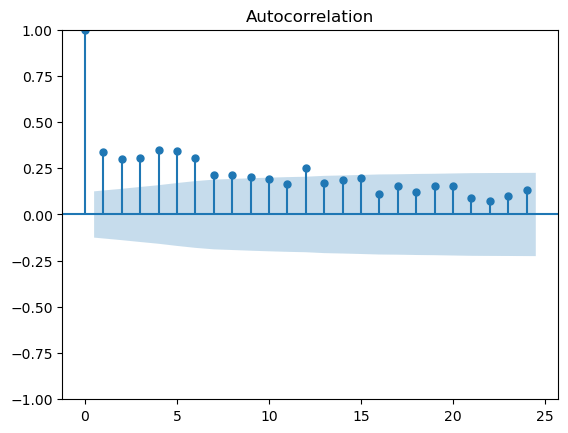

In [14]:
plot_acf(df_complete)
plt.show()

`q = 3`

## Obtaining the optimal orders using `auto_arima`

In [15]:
order = auto_arima(df_complete, start_p=0, star_q=0, start_order=0, max_p=5, max_q=5, max_order=5, trace=True, seasonal=False, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1541.576, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1415.956, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1417.943, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1419.603, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1421.558, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1421.531, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1482.962, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1417.945, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1419.903, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1421.595, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1422.965, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1456.885, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1419.532, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1421.476, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1415.221, Time=0.37 sec
 ARIMA(3,1

In [16]:
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  245
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -700.611
Date:                Sat, 23 Nov 2024   AIC                           1415.221
Time:                        15:22:40   BIC                           1439.701
Sample:                    03-01-2024   HQIC                          1425.081
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0100      0.028      0.350      0.726      -0.046       0.066
ar.L1          1.3479      0.042     32.167      0.000       1.266       1.430
ar.L2         -0.8955      0.045    -19.808      0.000      -0.984      -0.807
ma.L1         -2.2576      0.044    -51.845      0.000      -2.343      -2.172
ma.L2          2.1562      0.066     32.692      0.000       2.027       2.285
ma.L3         -0.8028      0.039    -20.442      0.000      -0.880      -0.726
sigma2        17.9376      1.480     12.121      0.000      15.037      20.838
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                19.32
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using `ARIMA Model` with the found orders to predict the daily future sales for the next month

In [17]:
df_complete.tail()

,cups
date,
2024-10-27,5.0
2024-10-28,18.0
2024-10-29,18.0
2024-10-30,16.0
2024-10-31,5.0


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_complete, order=(2, 1, 3), seasonal_order=(1, 1, 1, 30))
results = model.fit()

forecast = results.get_forecast(steps=30)
predictions = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

predictions_df = pd.DataFrame({
    'Prediction': predictions,
})

print(predictions_df.head())

C:\Users\grace\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\grace\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            Prediction
2024-11-01   13.233432
2024-11-02   15.924533
2024-11-03   16.263935
2024-11-04   15.633783
2024-11-05   11.475930


### Updating our data with the forecast result

In [19]:
df_final = pd.concat([df_complete, predictions_df], axis=0)
df_final.tail()

,cups,Prediction
2024-11-26,NaN,15.971441
2024-11-27,NaN,13.974605
2024-11-28,NaN,14.323025
2024-11-29,NaN,12.339821
2024-11-30,NaN,14.387277


## Ploting the final result

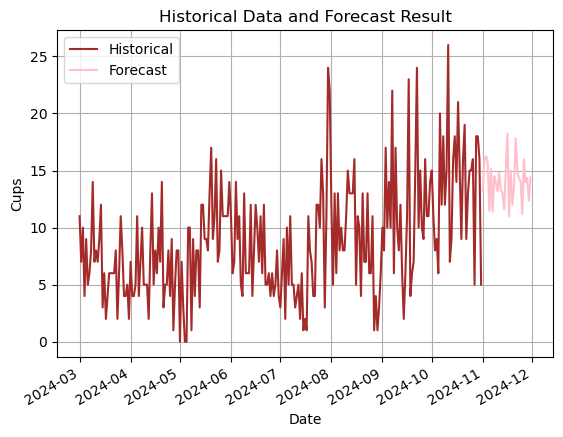

In [20]:
# Historical Data
plt.plot(df_complete.index, df_complete['cups'], label='Historical', color='brown')

# Forecast Result
plt.plot(predictions_df.index, predictions_df['Prediction'], label='Forecast', color='pink')

plt.xlabel('Date')
plt.ylabel('Cups')
plt.title('Historical Data and Forecast Result')
plt.legend()
plt.grid()

# Adjust x-axis labels
plt.gcf().autofmt_xdate()

# Final plot
plt.show()